In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
import numpy as np

In [3]:
#load data
growth_data = pd.read_csv('Data/230331 Growth pH dependence.csv')
#blank correction
average_blank = growth_data[['Blank','Blank.1','Blank.2']].mean().mean()
growth_data_bc = growth_data.drop(['Time [h]', 'Blank','Blank.1','Blank.2'],axis=1)
growth_data_bc = growth_data_bc - average_blank
growth_data_bc['Time [h]'] = growth_data['Time [h]']

In [4]:
def find_best_shift(col1, col2, steps=25):
    '''Returns the number of positions by which the second column must be 
    moved along the x-axis so that it shows best possible alignment with 
    the first column.'''
    f_shifts, r_shifts = [],[]
    for shift in range(0,steps,1):
        f_shifts.append(sum(abs(col1[shift:-25+shift].values - col2[:-25].values)))
    for shift in range(steps-1,0,-1):
        r_shifts.append(sum(abs(col1[:-25].values - col2[shift:-25+shift].values)))
    shifts = r_shifts + f_shifts
    return shifts.index(min(shifts)) - 25

In [5]:
samples = ['SC-Ura','50mM 7.0','50mM 7.5','50mM 8.0','50mM 8.5','50mM 9.0']
growth_data_av = pd.DataFrame(growth_data_bc['Time [h]'][:-50])
for sample in samples:
    s_0 = list(growth_data_bc[sample][25:-25])
    s_1_shift = find_best_shift(growth_data_bc[sample],growth_data_bc[sample+'.1'])
    s_1 = list(growth_data_bc[sample+'.1'][25 + s_1_shift:-25+s_1_shift])
    s_2_shift = find_best_shift(growth_data_bc[sample],growth_data_bc[sample+'.2'])
    s_2 = list(growth_data_bc[sample+'.2'][25 + s_1_shift:-25+s_1_shift])
    avs = []
    for i in range(len(s_0)):
        avs.append((s_0[i] + s_1[i] + s_2[i]) / 3)
    growth_data_av[sample] = avs

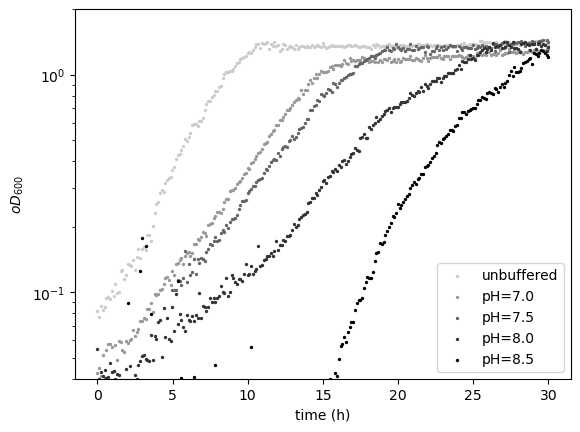

In [6]:
fig,ax = plt.subplots()
cut = 100
ax.scatter(growth_data_av['Time [h]'][:-cut], growth_data_av['SC-Ura'][:-cut],s=2,color=mpl.cm.gist_yarg(0.2), label = 'unbuffered')
ax.scatter(growth_data_av['Time [h]'][:-cut], growth_data_av['50mM 7.0'][:-cut],s=2,color=mpl.cm.gist_yarg(0.4), label = 'pH=7.0')
ax.scatter(growth_data_av['Time [h]'][42:-cut], growth_data_av['50mM 7.5'][:-42-cut],s=2,color=mpl.cm.gist_yarg(0.6), label = 'pH=7.5')
ax.scatter(growth_data_av['Time [h]'][:-cut], growth_data_av['50mM 8.0'][:-cut],s=2,color=mpl.cm.gist_yarg(0.8), label = 'pH=8.0')
ax.scatter(growth_data_av['Time [h]'][:-cut], growth_data_av['50mM 8.5'][:-cut],s=2,color=mpl.cm.gist_yarg(0.99), label = 'pH=8.5')
ax.set_yscale('log')
ax.set_ylim((0.04,2))
ax.set_ylabel('$oD_{600}$')
ax.set_xlabel('time (h)')
ax.legend()
plt.savefig('pH dependent growth.svg')
plt.show()